In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('housing.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
data['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

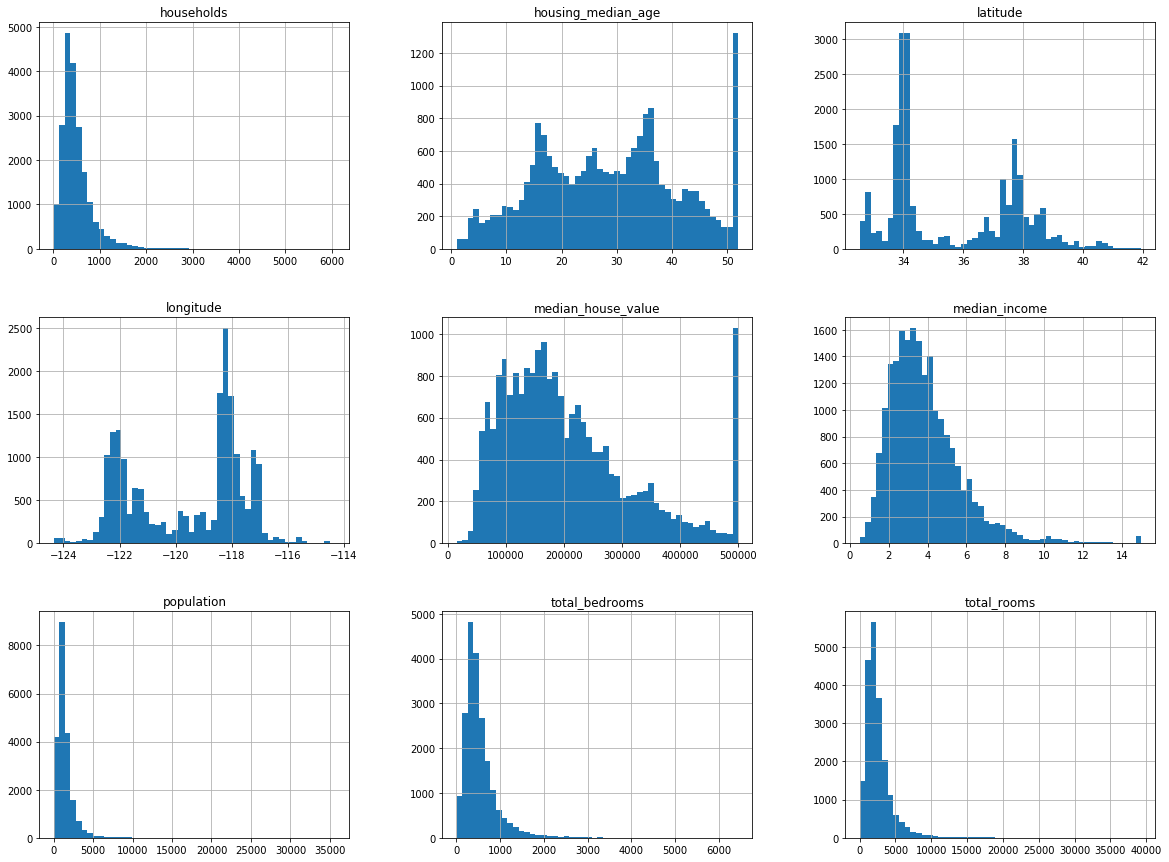

In [5]:
%matplotlib inline
data.hist(bins=50, figsize=(20,15))
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data, test_size=0.2, random_state=10)
print(len(train_set), 'train + ', len(test_set), 'test')

16512 train +  4128 test


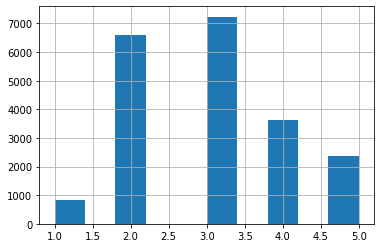

In [7]:
data['income_cat'] = np.ceil(data['median_income']/1.5)
data['income_cat'].where(data['income_cat'] < 5, 5.0, inplace=True)
data['income_cat'].hist()

In [8]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=10)
for train_index, test_index in split.split(data,data['income_cat']):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]
    

In [9]:
comparation = pd.DataFrame()
test_set['income_cat'] = np.ceil(test_set['median_income']/1.5)
test_set['income_cat'].where(test_set['income_cat'] < 5, 5.0, inplace=True)

comparation['all'] = data['income_cat'].value_counts()/len(data)
comparation['random'] = test_set['income_cat'].value_counts()/len(test_set)
comparation['strat'] = strat_test_set['income_cat'].value_counts()/len(strat_test_set)

comparation['rand_error(%)'] = ((comparation['all']-comparation['random'])*100)/comparation['all']
comparation['strat_error(%)'] = ((comparation['all']-comparation['strat'])*100)/comparation['all']
comparation

C:\Users\Diego\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Diego\anaconda3\lib\site-packages\pandas\core\generic.py:8767: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,all,random,strat,rand_error(%),strat_error(%)
3.0,0.350581,0.354409,0.350533,-1.091763,0.013820
2.0,0.318847,0.310562,0.318798,2.598389,0.015195
4.0,0.176308,0.177083,0.176357,-0.439681,-0.027480
5.0,0.114438,0.117733,0.114583,-2.878916,-0.127011
1.0,0.039826,0.040213,0.039729,-0.973236,0.243309


In [10]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_cat', axis=1, inplace=True)

In [11]:
housing = strat_train_set.copy()
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
13860,-117.26,34.48,6.0,4632.0,753.0,1851.0,694.0,4.1933,163100.0,INLAND
18923,-122.16,38.07,14.0,6360.0,1236.0,2876.0,1127.0,4.5321,190300.0,NEAR BAY
12925,-121.30,38.66,21.0,3824.0,634.0,1818.0,600.0,3.7120,139000.0,INLAND
13525,-117.29,34.17,35.0,4174.0,847.0,2127.0,778.0,3.2232,88300.0,INLAND
5027,-118.34,33.99,46.0,1217.0,322.0,662.0,305.0,3.1731,140300.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
17378,-120.42,34.97,18.0,1932.0,350.0,1071.0,346.0,4.1250,139800.0,<1H OCEAN
2093,-119.78,36.76,50.0,1343.0,322.0,1063.0,342.0,1.7500,49800.0,INLAND
7201,-118.18,34.02,36.0,1138.0,296.0,1484.0,320.0,2.2813,150700.0,<1H OCEAN
5375,-118.39,34.04,41.0,101.0,23.0,85.0,30.0,4.1250,237500.0,<1H OCEAN


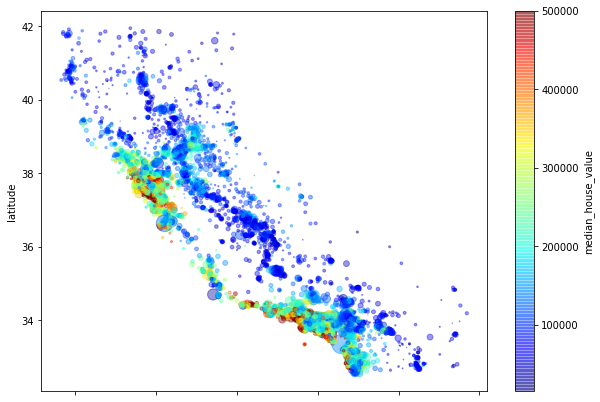

In [12]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, s=housing['population']/100, figsize=(10,7),
            c='median_house_value', colorbar=True, cmap=plt.get_cmap('jet'))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EFEE55A508>,
      dtype=object)

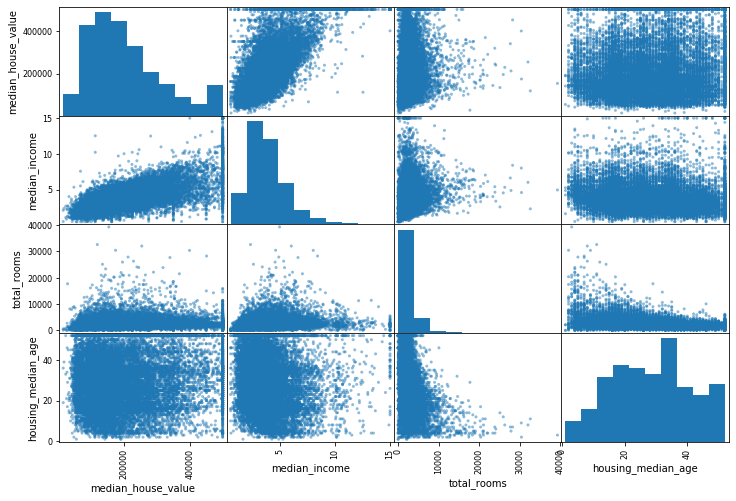

In [13]:
from pandas.plotting import scatter_matrix
attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(housing[attributes], figsize=(12,8))

In [14]:
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household'] = housing['population']/housing['households']

corr_matrix = housing.corr()
corr_matrix.sort_values(by='median_house_value' , ascending=False)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
median_house_value,-0.047029,-0.142767,0.105207,0.133556,0.047816,-0.025445,0.064821,0.688143,1.000000,0.150736,-0.254334,-0.033157
median_income,-0.017597,-0.078003,-0.121763,0.198694,-0.007365,0.004524,0.013556,1.000000,0.688143,0.344274,-0.618072,0.000115
rooms_per_household,-0.026095,0.107300,-0.162484,0.144115,0.005485,-0.072043,-0.081501,0.344274,0.150736,1.000000,-0.437810,0.002315
total_rooms,0.041552,-0.034738,-0.362091,1.000000,0.931504,0.855410,0.918269,0.198694,0.133556,0.144115,-0.190149,-0.031322
housing_median_age,-0.112242,0.015972,1.000000,-0.362091,-0.322209,-0.294594,-0.303700,-0.121763,0.105207,-0.162484,0.134788,0.012306
households,0.051258,-0.068877,-0.303700,0.918269,0.978703,0.907837,1.000000,0.013556,0.064821,-0.081501,0.061971,-0.035167
total_bedrooms,0.066160,-0.064800,-0.322209,0.931504,1.000000,0.877322,0.978703,-0.007365,0.047816,0.005485,0.081457,-0.036939
population,0.095988,-0.107604,-0.294594,0.855410,0.877322,1.000000,0.907837,0.004524,-0.025445,-0.072043,0.032770,0.068509
population_per_household,0.013830,-0.005081,0.012306,-0.031322,-0.036939,0.068509,-0.035167,0.000115,-0.033157,0.002315,-0.003813,1.000000
longitude,1.000000,-0.924811,-0.112242,0.041552,0.066160,0.095988,0.051258,-0.017597,-0.047029,-0.026095,0.096105,0.013830


In [15]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')
housing_num = housing.drop('ocean_proximity', axis=1)
imputer.fit(housing_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [16]:
imputer.statistics_

array([-1.18510000e+02,  3.42600000e+01,  2.90000000e+01,  2.12900000e+03,
        4.35000000e+02,  1.16350000e+03,  4.10000000e+02,  3.53245000e+00,
        1.79200000e+05,  5.23504365e+00,  2.03227213e-01,  2.81661676e+00])

In [17]:
imputer_trans = imputer.transform(housing_num)
housing_trans = pd.DataFrame(imputer_trans, columns = housing_num.columns)
housing_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 16512 non-null  float64
 1   latitude                  16512 non-null  float64
 2   housing_median_age        16512 non-null  float64
 3   total_rooms               16512 non-null  float64
 4   total_bedrooms            16512 non-null  float64
 5   population                16512 non-null  float64
 6   households                16512 non-null  float64
 7   median_income             16512 non-null  float64
 8   median_house_value        16512 non-null  float64
 9   rooms_per_household       16512 non-null  float64
 10  bedrooms_per_room         16512 non-null  float64
 11  population_per_household  16512 non-null  float64
dtypes: float64(12)
memory usage: 1.5 MB


In [18]:
housing_op = housing['ocean_proximity']
housing_op_encoded, housing_categories = housing_op.factorize()
print('housing_op_encoded:', housing_op_encoded )
print('housing_categories:', housing_categories )


housing_op_encoded: [0 1 0 ... 2 2 2]
housing_categories: Index(['INLAND', 'NEAR BAY', '<1H OCEAN', 'NEAR OCEAN', 'ISLAND'], dtype='object')


In [20]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
housing_op_oh = encoder.fit_transform(housing_op_encoded.reshape(-1,1))
print('housing_op_oh')
housing_op_oh.toarray()

housing_op_oh


array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.]])

AttributeError: categories not found